In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-12-24 08:38:30.628381: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-24 08:38:34.607387: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-24 08:38:34.718193: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-24 08:38:34.718638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-24 08:38:34.718685: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [2]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Load models

## Custom CNN model

Training with Data Augmentation

In [ ]:
model_A = get_model_A(0.0, True, 0.0)

lr = 0.001
model_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_A.load_weights('.model_a')

test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)


2022-12-24 15:07:39.617605: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_a: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 3s 11ms/step - loss: 0.1574 - accuracy: 0.9392
Test accuracy : 0.9392244815826416


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.005s...
[t-SNE] Computed neighbors for 8227 samples in 1.952s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 3.110095
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.054665


2022-12-24 08:40:15.656875: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_b_lr: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 3s 11ms/step - loss: 0.1382 - accuracy: 0.9472
Test accuracy : 0.9472468495368958


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.001s...
[t-SNE] Computed neighbors for 8227 samples in 2.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 3.375556
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.291382
[t-SNE] KL divergence after 2500 iterations: 1.882285


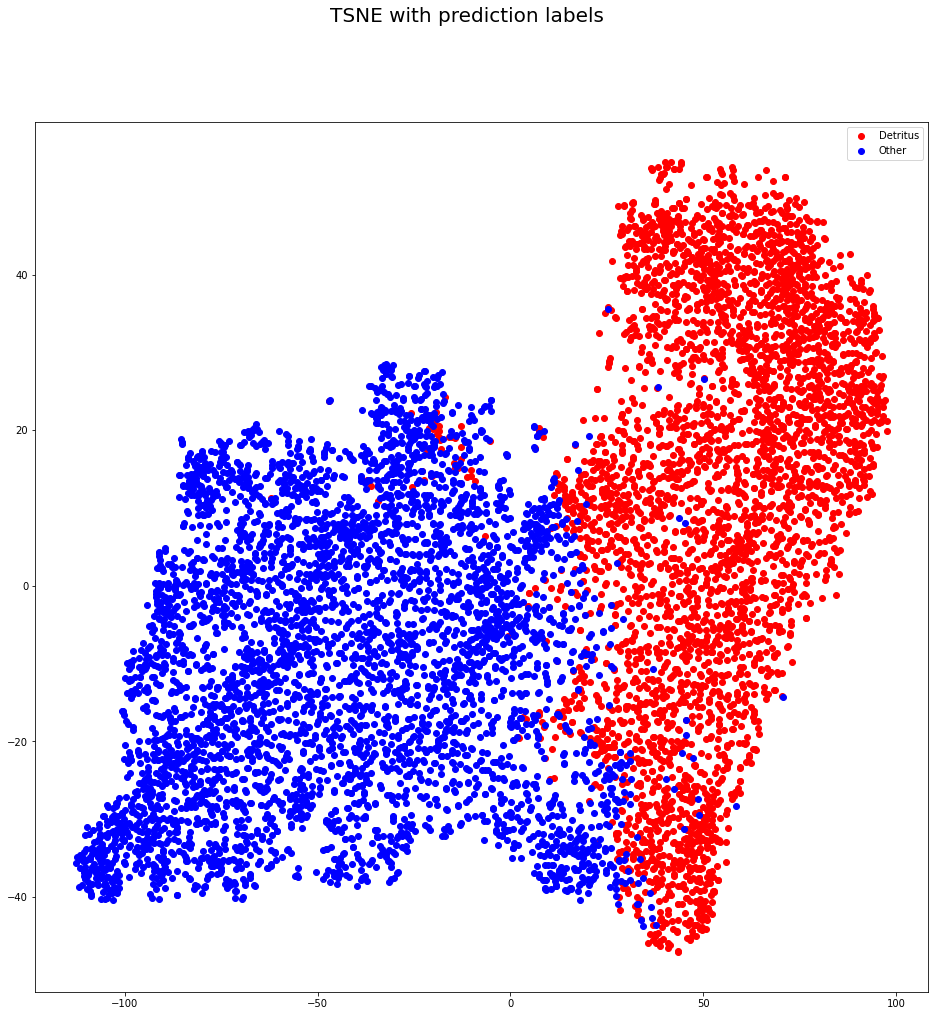

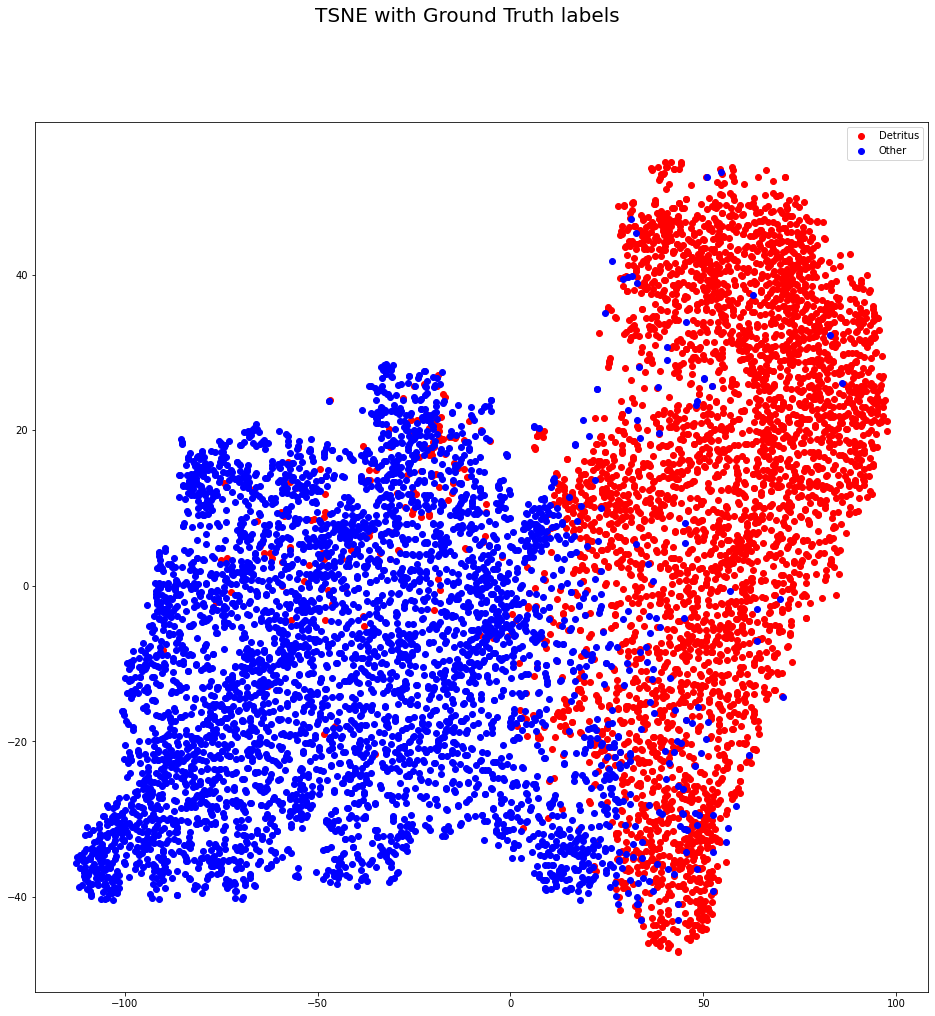

In [8]:
model_B = get_model_B(0.0, True, 0.0)

lr = 0.001
model_B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_B.load_weights('.model_b')

test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)


In [9]:
def get_mobile_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    if data_aug:
        dag = data_augmentation(inputs)
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(dag)
    else:
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
    
    x = base_model(processed_input)
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    x = global_average_layer(x)
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

## MobileNetV2 Model From Scratch

2022-12-24 12:21:15.183597: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .mobile_net_scratch: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 7s 23ms/step - loss: 0.1297 - accuracy: 0.9542
Test accuracy : 0.9541752934455872


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.010s...
[t-SNE] Computed neighbors for 8227 samples in 2.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 0.757673
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.234467
[t-SNE] KL divergence after 2500 iterations: 1.350119


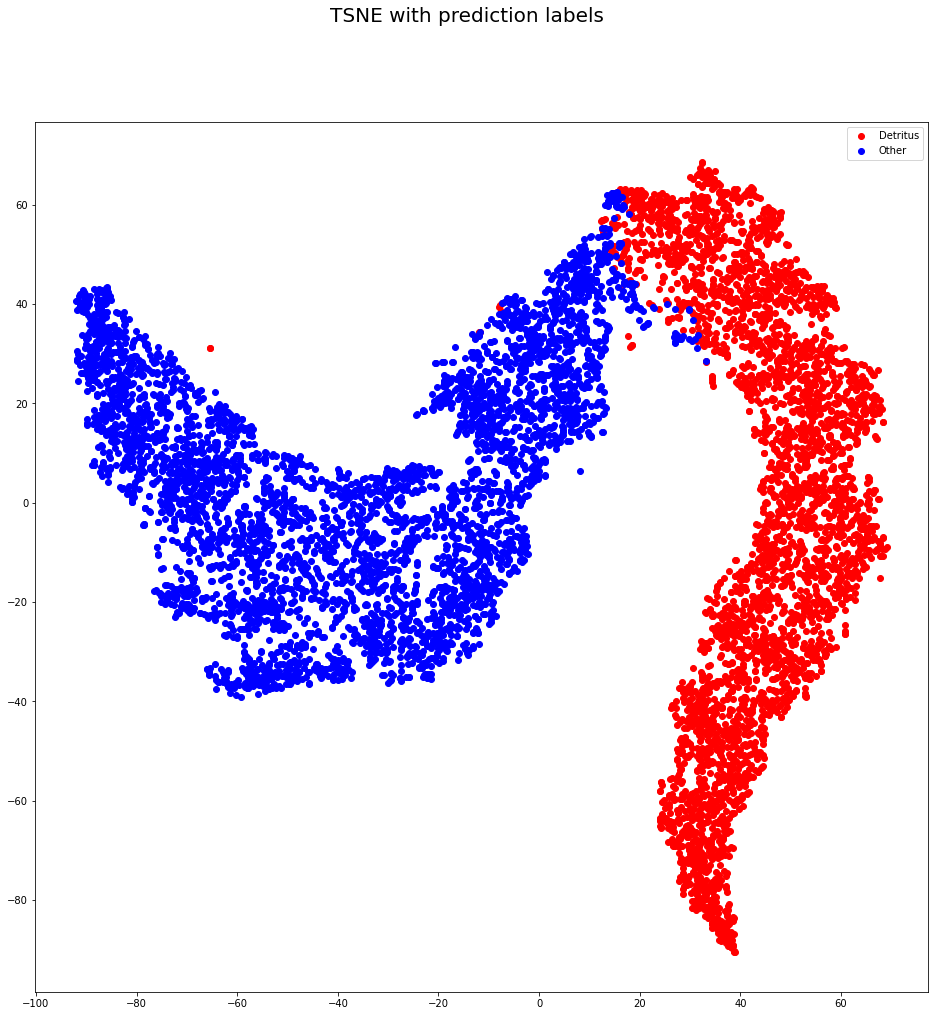

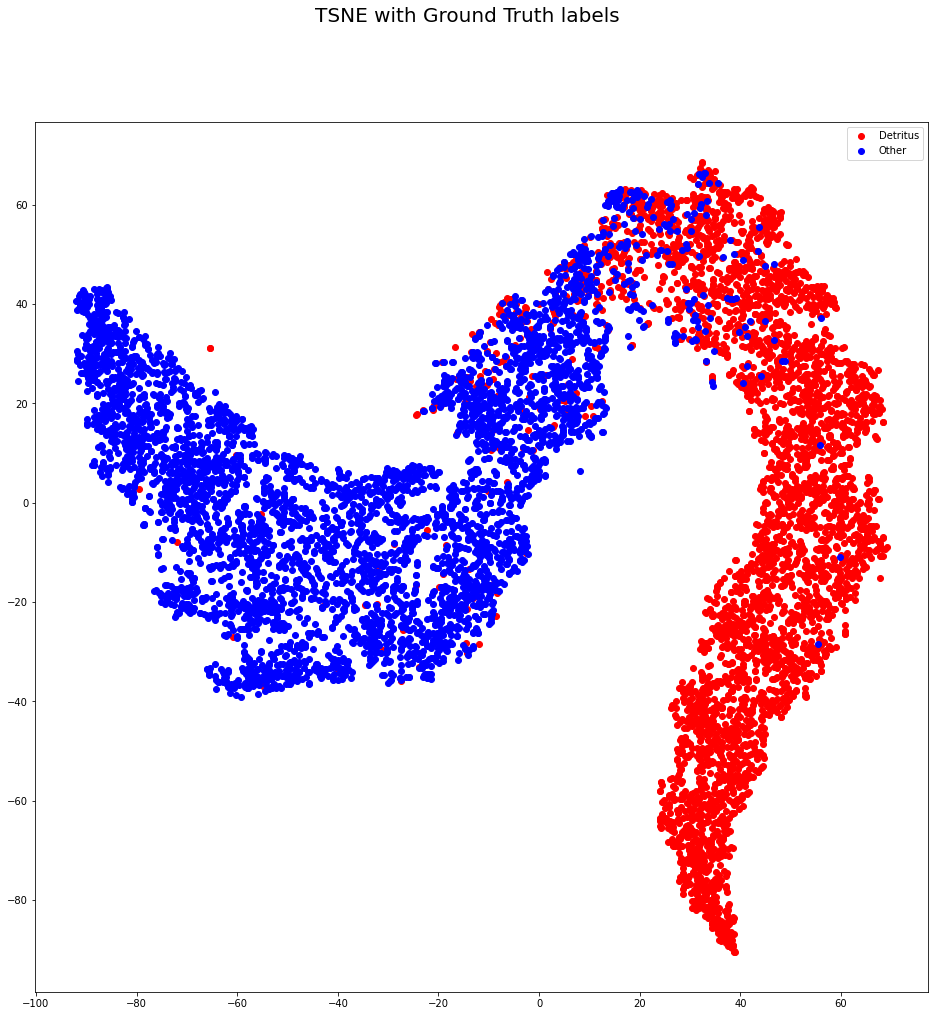

In [31]:
lr = 0.0001
mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
mobileNetModelSc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

mobileNetModelSc.load_weights('.mobile_net_scratch')

test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

## DenseNet model

In [11]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

2022-12-24 08:43:22.957465: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .dense_net_ft_lr: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 21s 62ms/step - loss: 0.1566 - accuracy: 0.9436
Test accuracy : 0.9436003565788269


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.019s...
[t-SNE] Computed neighbors for 8227 samples in 3.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 7.215098
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.788467
[t-SNE] KL divergence after 2500 iterations: 2.176167


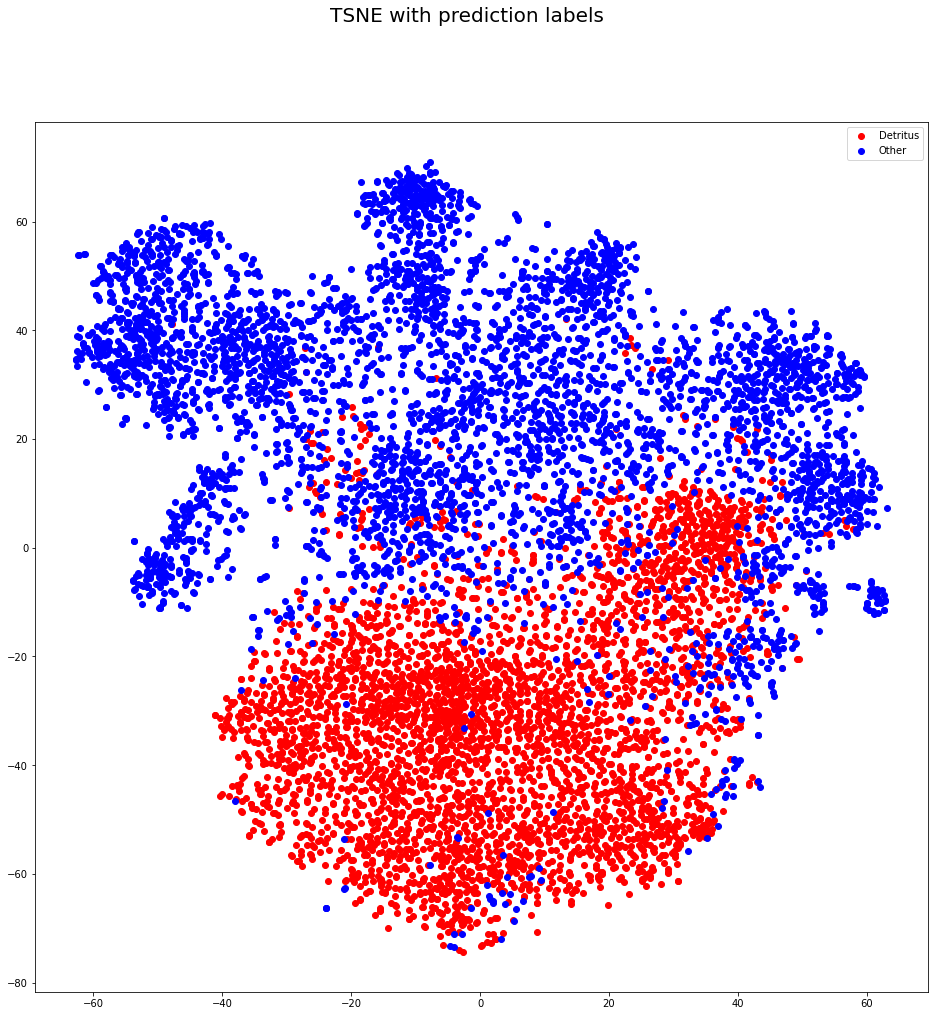

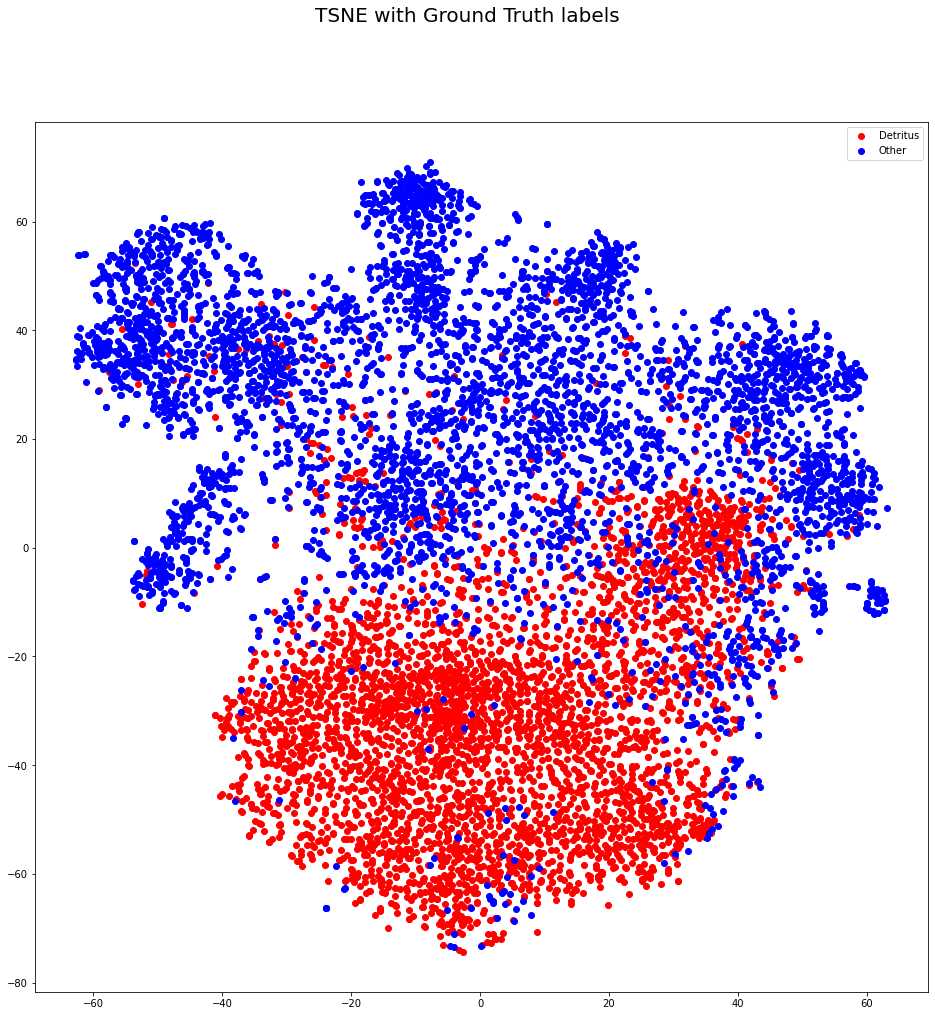

In [12]:
_, dense_model = get_dense_net(0.0, True, 0.0)

dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

dense_model.load_weights('.dense_net_ft_lr')

loss, accuracy = dense_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
    
print_tsne(dense_model, test_dataset, 2500)

## Inception Resnet

In [13]:
base_learning_rate = 0.0001
inception_resnet_base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
inception_resnet_base_model.trainable = False
ir_preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input
ir_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
ir_prediction_layer = tf.keras.layers.Dense(1)

ir_inputs = tf.keras.Input(shape=(160, 160, 3))
dag = data_augmentation(ir_inputs)
ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(dag)

ir_x = inception_resnet_base_model(ir_x, training=False)
ir_x = ir_global_average_layer(ir_x)
ir_outputs = ir_prediction_layer(ir_x)
ir_model = tf.keras.Model(ir_inputs, ir_outputs)
    
ir_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

2022-12-24 08:45:54.172246: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .inception_resnet_v2_lr: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 23s 71ms/step - loss: 0.1680 - accuracy: 0.9347
Test accuracy : 0.934727132320404


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.016s...
[t-SNE] Computed neighbors for 8227 samples in 2.957s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 6.671487
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.318581
[t-SNE] KL divergence after 2500 iterations: 2.072471


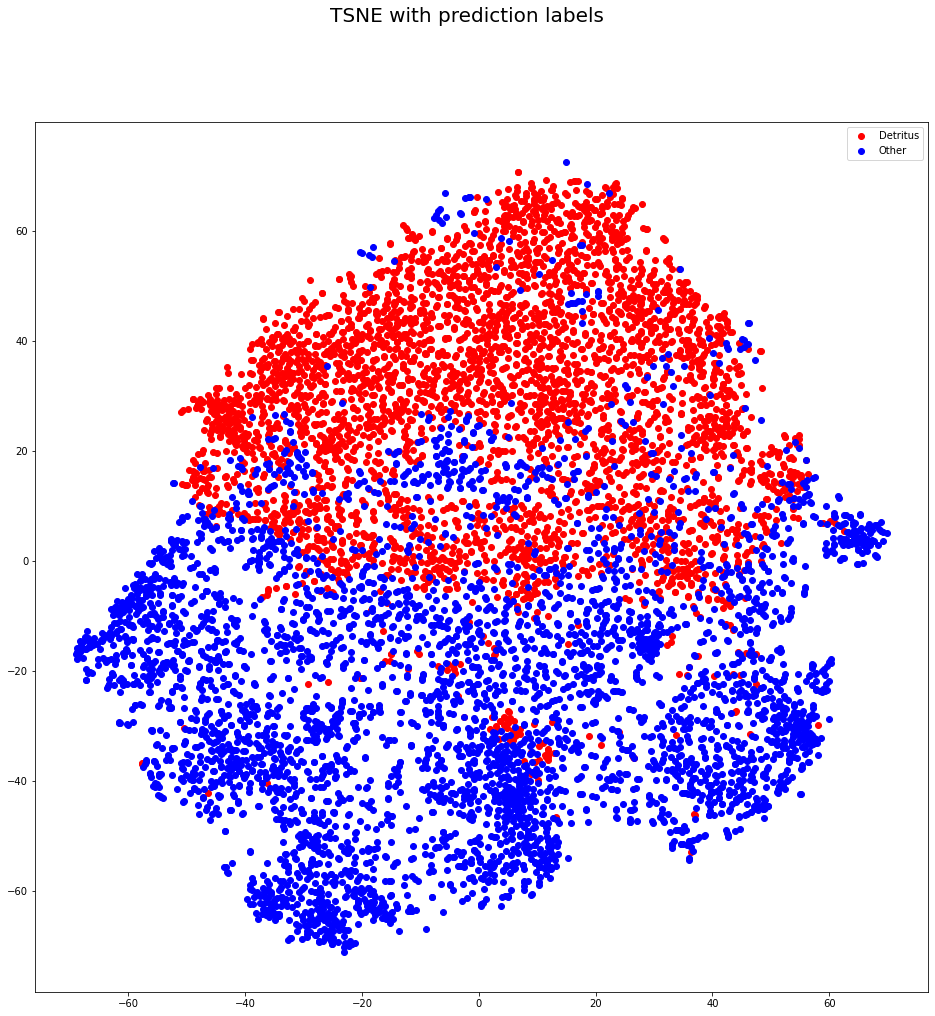

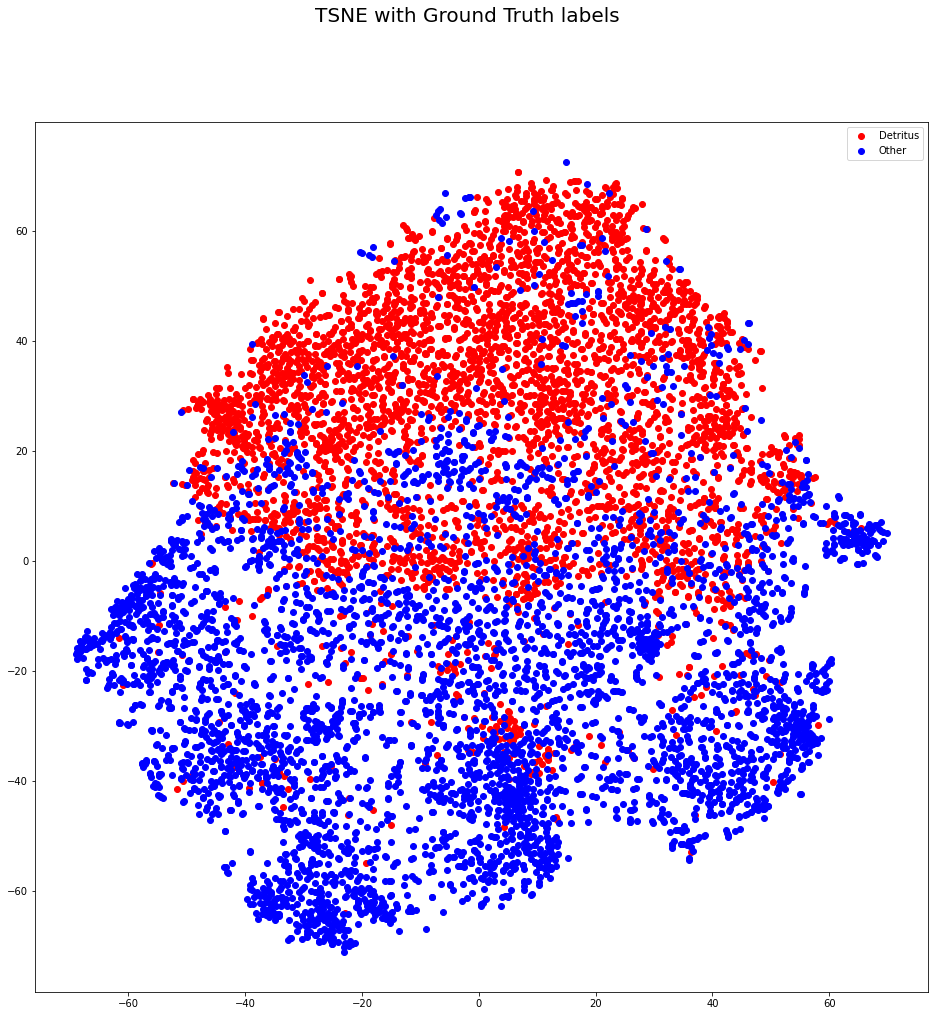

In [14]:
ir_model.load_weights('.inception_resnet_v2_lr')

loss, accuracy = ir_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
    
print_tsne(ir_model, test_dataset, 2500)

# Analyze models

In [15]:
def show_confusion_matrix(model, generator):
    test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
    predictions = model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    detr_list = ['LClass_Detritus', 'LClass_Bubbles', 'LClass_shadow']
    
    true_classes = generator.classes
    filepaths = generator.filepaths
    label_map = generator.class_indices
    index_map = {v: k for k, v in label_map.items()}
    
    class_labels = list(generator.class_indices.keys()) 
    correct =  {new_key: 0 for new_key in class_labels}
    incorrect = {new_key: 0 for new_key in class_labels}
    correct_files = []
    incorrect_files = []
    
    
    for i in range(len(true_classes)):
        if any(index_map[true_classes[i]] in s for s in detr_list):
            if (y_pred[i] == 0):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
        else:
            if (y_pred[i] == 1):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
    # report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    for class_name in class_labels:
        corr = correct[class_name]
        incorr = incorrect[class_name]
        total = corr + incorr
        if (total == 0):
            corr_perc = 0
        else:
            corr_perc = corr/total
        print(class_name, corr, incorr, total, corr_perc)
    return correct, incorrect, correct_files, incorrect_files

## Test generator

In [16]:
from sklearn import metrics

def show_report(model, generator):
    test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
    predictions = model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())   
    report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    print(report)

In [17]:
show_report(model_B, test_data_generator)
test_accuracy(model_B, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.79      0.97      0.87      3804
       Other       0.97      0.78      0.87      4423

    accuracy                           0.87      8227
   macro avg       0.88      0.88      0.87      8227
weighted avg       0.89      0.87      0.87      8227

258/258 [==============================] - 3s 11ms/step - loss: 0.1382 - accuracy: 0.9472
Test accuracy : 0.9472468495368958


0.9472468495368958

In [18]:
show_report(mobileNetModelSc, test_data_generator)
test_accuracy(mobileNetModelSc, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.73      0.99      0.84      3804
       Other       0.99      0.69      0.81      4423

    accuracy                           0.83      8227
   macro avg       0.86      0.84      0.83      8227
weighted avg       0.87      0.83      0.82      8227

258/258 [==============================] - 6s 23ms/step - loss: 0.1145 - accuracy: 0.9599
Test accuracy : 0.9598881602287292


0.9598881602287292

In [19]:
show_report(dense_model, test_data_generator)
test_accuracy(dense_model, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.81      0.93      0.87      3804
       Other       0.93      0.81      0.87      4423

    accuracy                           0.87      8227
   macro avg       0.87      0.87      0.87      8227
weighted avg       0.88      0.87      0.87      8227

258/258 [==============================] - 15s 59ms/step - loss: 0.1566 - accuracy: 0.9436
Test accuracy : 0.9436003565788269


0.9436003565788269

In [20]:
show_report(ir_model, test_data_generator)
test_accuracy(ir_model, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.85      0.94      0.89      3804
       Other       0.94      0.85      0.90      4423

    accuracy                           0.89      8227
   macro avg       0.90      0.90      0.89      8227
weighted avg       0.90      0.89      0.89      8227

258/258 [==============================] - 18s 69ms/step - loss: 0.1680 - accuracy: 0.9347
Test accuracy : 0.934727132320404


0.934727132320404

# Analyzing images

In [21]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(mobileNetModelSc, test_data_generator)

Detritus 3763 41 3804 0.9892218717139852
Other 3040 1383 4423 0.6873163011530635


In [22]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(dense_model, test_data_generator)

Detritus 3549 255 3804 0.9329652996845426
Other 3589 834 4423 0.8114401989599819


In [23]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(model_B, test_data_generator)

Detritus 3701 103 3804 0.9729232386961093
Other 3468 955 4423 0.7840832014469817


In [24]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(ir_model, test_data_generator)

Detritus 3582 222 3804 0.9416403785488959
Other 3773 650 4423 0.8530409224508252


In [25]:
result = mobileNetModelSc.evaluate(test_dataset)


258/258 [==============================] - 6s 23ms/step - loss: 0.1145 - accuracy: 0.9599


In [26]:
result

[0.11447520554065704, 0.9598881602287292]

In [27]:
result = mobileNetModelSc.predict(test_dataset)   

In [28]:
result

array([[ 2.0210998],
       [ 0.6157658],
       [-3.4505758],
       ...,
       [ 5.55712  ],
       [ 9.986871 ],
       [ 1.8418354]], dtype=float32)